# Predicting Solar Production using XGBoost

## Importing non preprocessed data

In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('/Users/niki/code/Niki827/watt_squad/raw_data/train.csv')
test_data = pd.read_csv('/Users/niki/code/Niki827/watt_squad/raw_data/test.csv')

### Creating X_train, y_train, X_test, y_test

In [4]:
X_train_nt = train_data.drop(columns=['time', 'pv_production', 'wind_production','consumption', 'spot_market_price'])
y_train = train_data['pv_production']

In [5]:
X_test_nt = test_data.drop(columns=['time', 'pv_production', 'wind_production','consumption', 'spot_market_price'])
y_test = test_data['pv_production']

### Creating validation splits

In [6]:
from sklearn.model_selection import train_test_split

# Use the same function above for the validation set
X_train_nt, X_val, y_train, y_val = train_test_split(
    X_train_nt, y_train, test_size = 0.1, random_state = 42  # val = 10%
)

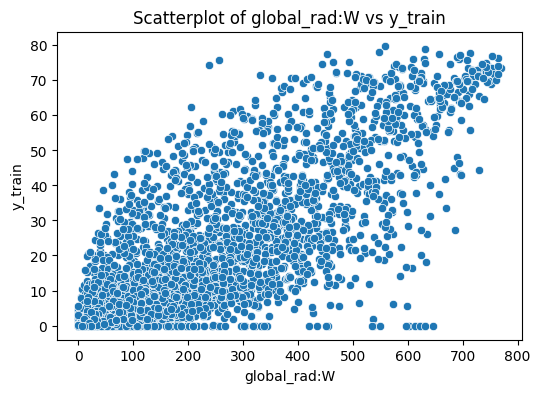

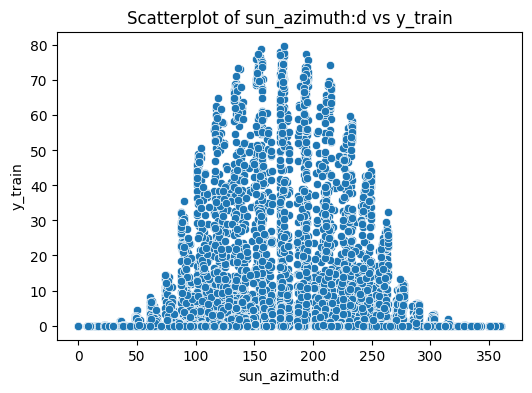

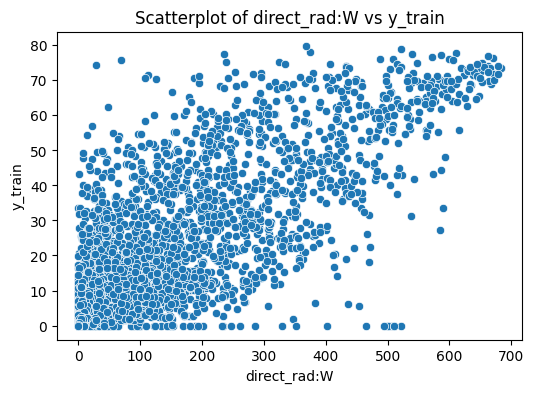

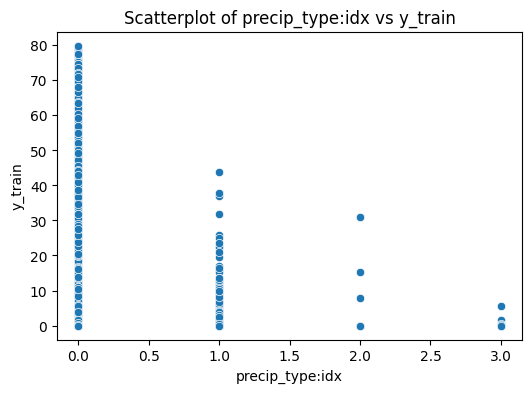

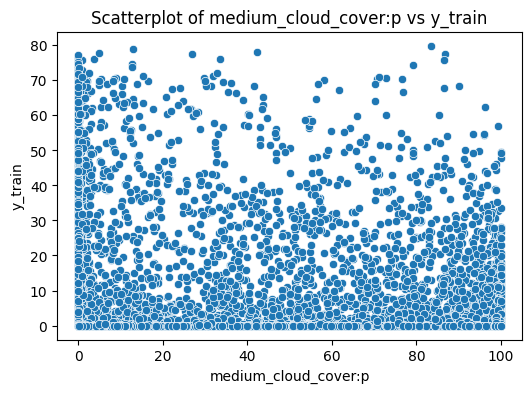

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the 5 most important features
important_features = [
    'global_rad:W',
    'sun_azimuth:d',
    'direct_rad:W',
    'precip_type:idx',
    'medium_cloud_cover:p'
]

# Create a scatterplot for each feature
for feature in important_features:
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.scatterplot(x=X_train_nt[feature], y=y_train)
    plt.title(f"Scatterplot of {feature} vs y_train")
    plt.xlabel(feature)
    plt.ylabel("y_train")
    #plt.xlim(0.4, None)  # Set the lower limit of the x-axis to 0.4
    plt.show()

In [2]:
# creating y_train dataframe
y_train = y.copy()['pv_production']

# Importing y_test
y_test = pd.read_csv('/Users/niki/code/Niki827/watt_squad/raw_data/test.csv')
y_test = y_test['pv_production']

## Calculating feature importance

In [ ]:
X_train_nt, X_val, y_train, y_val

In [33]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train_nt, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
import pandas as pd

importance = model.feature_importances_
feature_names = X_train_nt.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

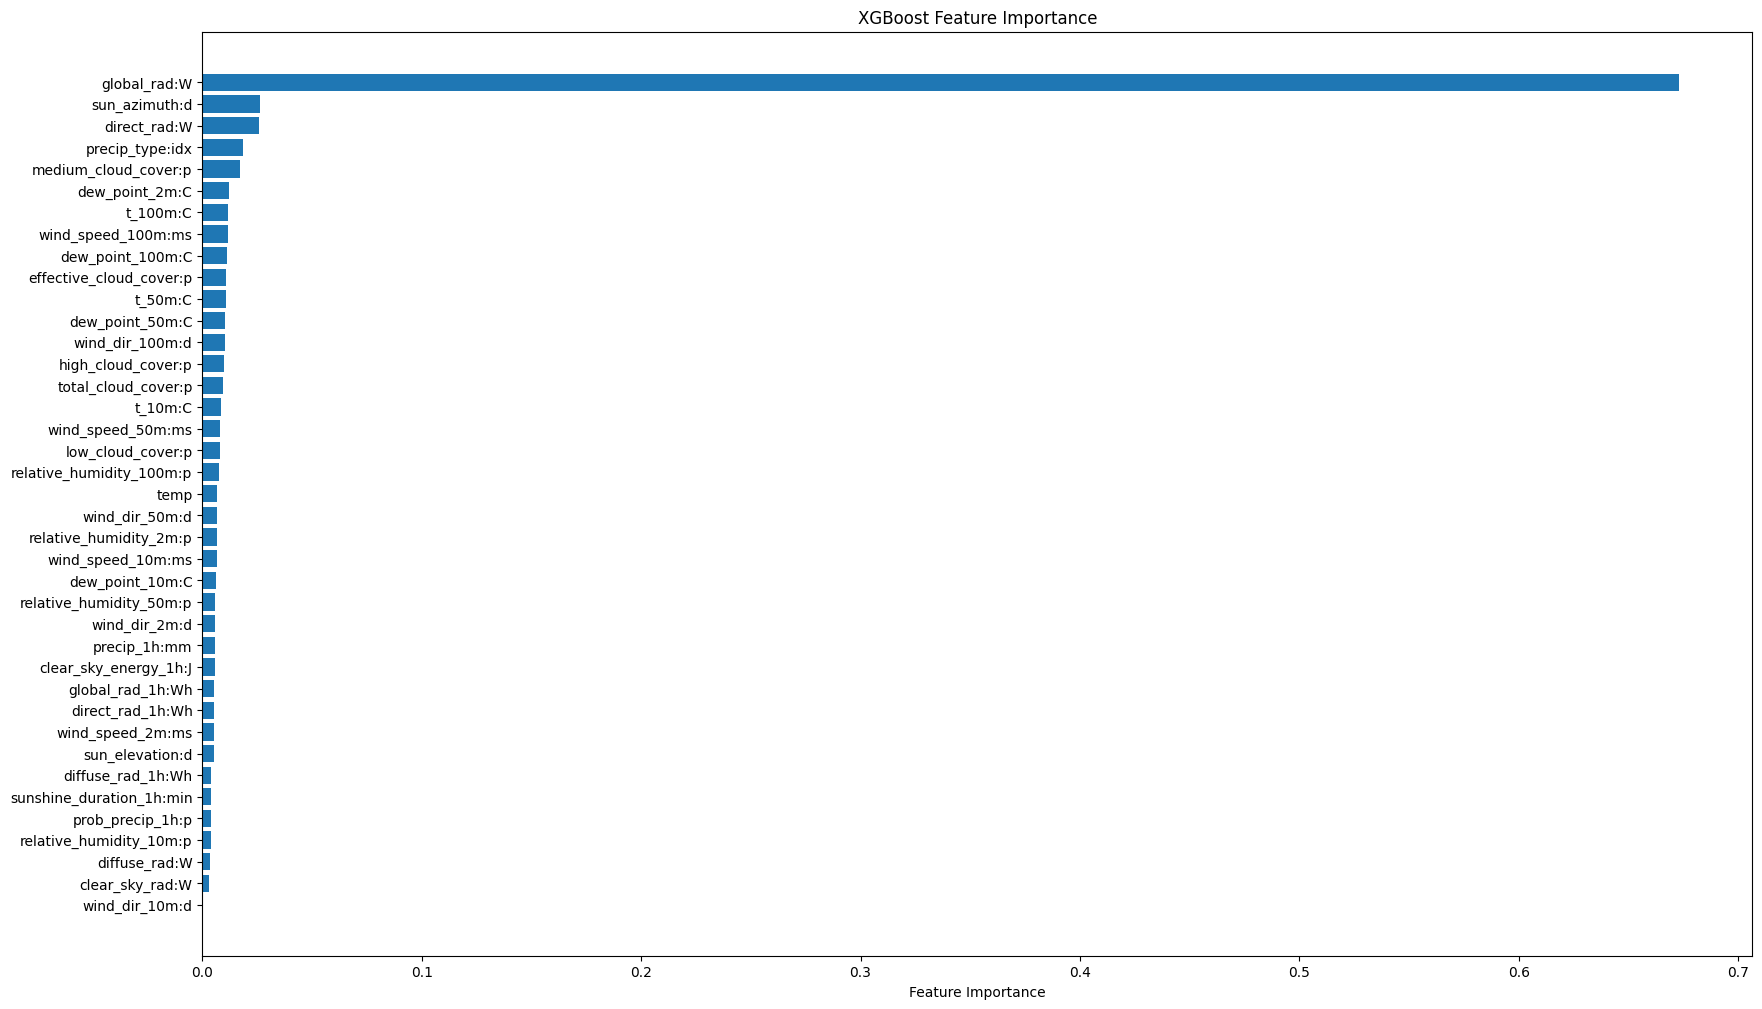

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

In [36]:
importance_df

,Feature,Importance
9,global_rad:W,0.672854
12,sun_azimuth:d,0.026415
7,direct_rad:W,0.025634
1,precip_type:idx,0.018351
15,medium_cloud_cover:p,0.017268
21,dew_point_2m:C,0.012273
34,t_100m:C,0.011849
37,wind_speed_100m:ms,0.011630
36,dew_point_100m:C,0.011460
18,effective_cloud_cover:p,0.010941


## Building an XGBRegressor

In [47]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(max_depth=4, n_estimators=2000, learning_rate=0.01)

xgb_history = xgb_reg.fit(X_train_nt[['global_rad:W', 'sun_azimuth:d', 'direct_rad:W', 'precip_type:idx', 'medium_cloud_cover:p']], y_train,
    # evaluate loss at each iteration
    eval_set=[(X_val[['global_rad:W', 'sun_azimuth:d', 'direct_rad:W', 'precip_type:idx', 'medium_cloud_cover:p']], y_val)],  
)

#y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:14.75365
[1]	validation_0-rmse:14.64302
[2]	validation_0-rmse:14.53268
[3]	validation_0-rmse:14.42487
[4]	validation_0-rmse:14.31799
[5]	validation_0-rmse:14.21119
[6]	validation_0-rmse:14.10678
[7]	validation_0-rmse:14.00324
[8]	validation_0-rmse:13.90165
[9]	validation_0-rmse:13.80065
[10]	validation_0-rmse:13.70170
[11]	validation_0-rmse:13.60257
[12]	validation_0-rmse:13.50541
[13]	validation_0-rmse:13.41027
[14]	validation_0-rmse:13.31549
[15]	validation_0-rmse:13.22145
[16]	validation_0-rmse:13.13008
[17]	validation_0-rmse:13.03827
[18]	validation_0-rmse:12.94895
[19]	validation_0-rmse:12.85996
[20]	validation_0-rmse:12.77246
[21]	validation_0-rmse:12.68717
[22]	validation_0-rmse:12.60170
[23]	validation_0-rmse:12.51727
[24]	validation_0-rmse:12.43376
[25]	validation_0-rmse:12.35164
[26]	validation_0-rmse:12.27071
[27]	validation_0-rmse:12.19196
[28]	validation_0-rmse:12.11259
[29]	validation_0-rmse:12.03427
[30]	validation_0-rmse:11.95826
[31]	validation_0-

In [18]:
print(y_train.mean(), y_train.std())

7.732718920390049 15.760882726051298


## Finding feature performance

In [9]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
import pandas as pd

importance = model.feature_importances_
feature_names = X_train_transformed.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [15]:
importance_df

,Feature,Importance
14,minmaxscaler__global_rad:W,0.650919
12,minmaxscaler__direct_rad:W,0.031483
23,minmaxscaler__cos_sun_azimuth:d,0.024013
18,minmaxscaler__medium_cloud_cover:p,0.016735
7,minmaxscaler__prob_precip_1h:p,0.016584
21,minmaxscaler__effective_cloud_cover:p,0.014625
42,robustscaler__t_10m:C,0.014284
46,robustscaler__wind_speed_10m:ms,0.012417
50,onehotencoder__precip_type:idx_1.0,0.010546
44,robustscaler__t_100m:C,0.009940


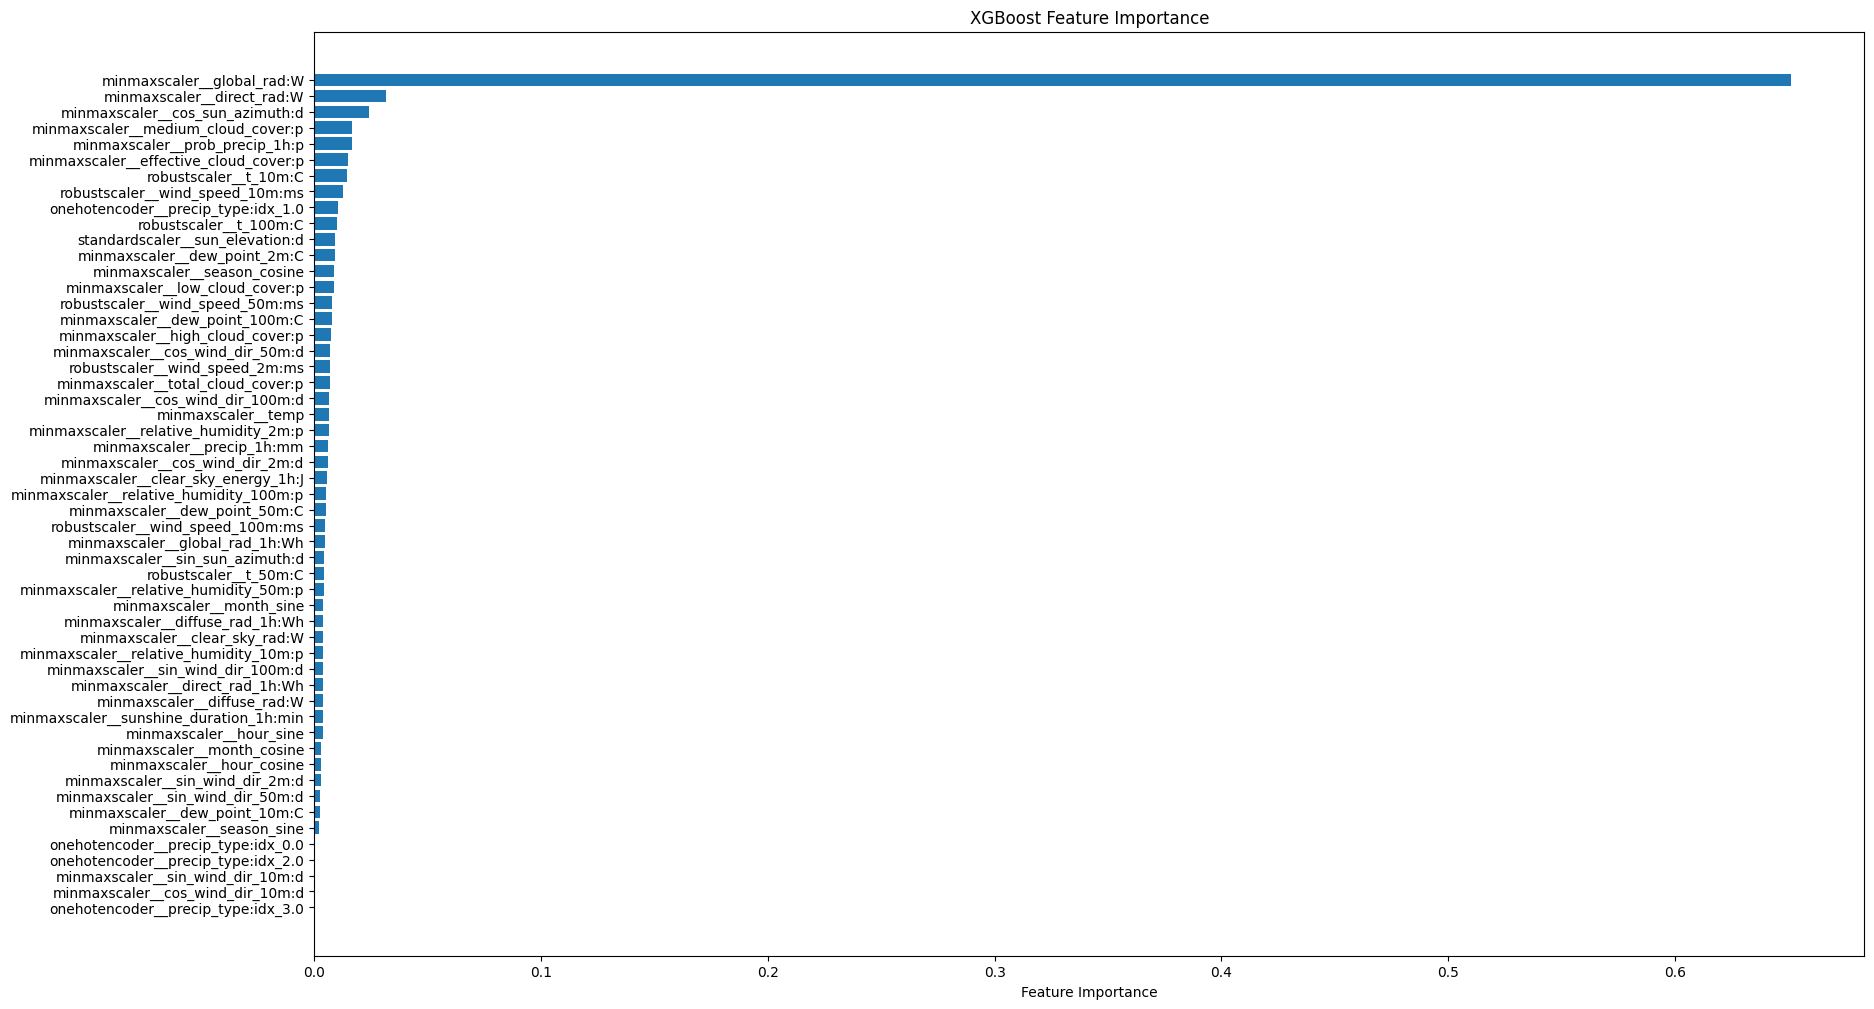

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

# Coding RNNs with Elaine

In [4]:
X_train_transformed.shape

(9515, 53)

In [25]:
X_train_tra

,precip_1h:mm,precip_type:idx,prob_precip_1h:p,clear_sky_rad:W,clear_sky_energy_1h:J,diffuse_rad:W,diffuse_rad_1h:Wh,direct_rad:W,direct_rad_1h:Wh,global_rad:W,...,sin_sun_azimuth:d,cos_sun_azimuth:d,sin_wind_dir_2m:d,cos_wind_dir_2m:d,sin_wind_dir_10m:d,cos_wind_dir_10m:d,sin_wind_dir_50m:d,cos_wind_dir_50m:d,sin_wind_dir_100m:d,cos_wind_dir_100m:d
0,-11.512925,0.0,0.00001,2.302586,11.079462,2.001481,2.564258,-1.203939,0.635523,2.041222,...,0.882291,-0.922834,-9.510565e-01,-0.416281,-9.510565e-01,-0.416281,0.809017,-0.401948,-0.809017,-0.385906
1,-11.512925,0.0,0.00001,-11.512925,9.100648,-11.512925,1.306983,-11.512925,-2.024878,-11.512925,...,0.288029,-0.808062,9.510565e-01,-0.302370,9.510565e-01,-0.302370,0.809017,-0.304033,0.309017,-0.307357
2,-11.512925,0.0,0.00001,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,...,-0.575005,-0.653487,8.090170e-01,-0.270600,8.090170e-01,-0.270600,0.309017,-0.273959,-0.587785,-0.278991
3,-11.512925,0.0,0.00001,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,...,0.134678,-0.468809,2.057035e-14,-0.258819,2.057035e-14,-0.258819,0.951057,-0.265556,0.587785,-0.272280
4,-11.512925,0.0,0.00001,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,...,0.478998,-0.261499,-9.510565e-01,-0.351842,-9.510565e-01,-0.351842,-1.000000,-0.350207,-0.809017,-0.346936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,-11.512925,0.0,0.00001,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,...,-0.963724,0.200839,-9.510565e-01,-0.699663,-9.510565e-01,-0.699663,-0.587785,-0.626604,0.809017,-0.525472
9511,-11.512925,0.0,0.00001,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,...,0.656586,0.441944,-8.090170e-01,-0.773840,-8.090170e-01,-0.773840,0.309017,-0.708340,-0.587785,-0.618408
9512,-11.512925,0.0,0.00001,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,...,0.756310,0.672664,8.090170e-01,-0.780430,8.090170e-01,-0.780430,1.000000,-0.713250,-0.809017,-0.619779
9513,-11.512925,0.0,0.00001,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,-11.512925,...,0.012566,0.866060,5.877853e-01,-0.806960,5.877853e-01,-0.806960,0.587785,-0.733730,-0.309017,-0.627963


In [5]:
X_train_transformed_new = np.expand_dims(X_train_transformed, axis=0)

In [6]:
X_train_transformed_new.shape

(1, 9515, 53)

In [7]:
y.shape

(9515, 3)

In [10]:
y_new = np.expand_dims(y, axis=0)

In [12]:
y_new.shape

(1, 9515, 3)

In [17]:
# 0- Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# 1- RNN Architecture
model = Sequential()
model.add(layers.SimpleRNN(units=10, activation='tanh', input_shape=(9515,53)))
model.add(layers.Dense(3, activation="linear"))

# 2- Compilation
model.compile(loss='mse', 
              optimizer=Adam(lr=0.5), metrics=['mae']) # very high lr so we can converge with such a small dataset

# 3- Fit
model.fit(X_train_transformed_new, y_new, epochs=50, verbose=1, batch_size=1)

Epoch 1/50
1/1 [==============================] - 1s 533ms/step - loss: 932.5385 - mae: 17.2769
Epoch 2/50
1/1 [==============================] - 0s 216ms/step - loss: 865.0735 - mae: 16.6691
Epoch 3/50
1/1 [==============================] - 0s 217ms/step - loss: 757.4712 - mae: 15.0676
Epoch 4/50
1/1 [==============================] - 0s 220ms/step - loss: 684.7925 - mae: 14.5591
Epoch 5/50
1/1 [==============================] - 0s 215ms/step - loss: 633.2362 - mae: 14.3147
Epoch 6/50
1/1 [==============================] - 0s 225ms/step - loss: 607.2266 - mae: 14.5244
Epoch 7/50
1/1 [==============================] - 0s 209ms/step - loss: 601.2207 - mae: 15.1668
Epoch 8/50
1/1 [==============================] - 0s 212ms/step - loss: 607.4212 - mae: 15.9952
Epoch 9/50
1/1 [==============================] - 0s 211ms/step - loss: 619.1291 - mae: 16.7247
Epoch 10/50
1/1 [==============================] - 0s 211ms/step - loss: 630.7957 - mae: 17.1694
Epoch 11/50
1/1 [======================

In [22]:
X_test_transformed_new = np.expand_dims(X_test_transformed, axis=0)

In [23]:
X_test_transformed_new.shape

(1, 841, 53)

In [24]:
# 4- Predict
model.predict(X_test_transformed_new)

ValueError: in user code:

    File "/Users/niki/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/niki/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/niki/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/niki/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/niki/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/niki/.pyenv/versions/3.10.6/envs/watt_squad/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 9515, 53), found shape=(None, 841, 53)


## To replace and double check

"input_shape=(9515,3)"
- replace the 3 with the number of features that we are using

"model.fit(X, y, epochs=10000, verbose=0)"
- check that X contains all of our features and y contains all of our targets only